<a href="https://colab.research.google.com/github/KiaraMayssa/miRepositorio/blob/main/Practica2RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Archivo_Prueba.csv') #leer el archivo
data.head() #Observar los primeros 5 renglones

,Unnamed: 0,Index,Height,Weight,imc
0,1,1,1.670896,51.252268,18.357529
1,2,2,1.816486,61.909274,18.762532
2,3,3,1.762728,69.411472,22.338842
3,4,4,1.732702,64.561914,21.504474
4,5,5,1.721810,65.451722,22.077527


In [4]:
data = data.iloc[:, 1:]
data.head()

,Height,Weight,imc
0,1.670896,51.252268,18.357529
1,1.816486,61.909274,18.762532
2,1.762728,69.411472,22.338842
3,1.732702,64.561914,21.504474
4,1.721810,65.451722,22.077527


In [10]:
CambioNombre = {
    'Height': 'Altura',
    'Weight': 'Peso',
}
data = data.rename(columns=CambioNombre)
data.head()

,Altura,Peso,imc
0,1.670896,51.252268,18.357529
1,1.816486,61.909274,18.762532
2,1.762728,69.411472,22.338842
3,1.732702,64.561914,21.504474
4,1.721810,65.451722,22.077527


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Altura  25000 non-null  float64
 1   Peso    25000 non-null  float64
 2   imc     25000 non-null  float64
dtypes: float64(3)
memory usage: 586.1 KB


In [14]:
data.describe()

,Altura,Peso,imc
count,25000.000000,25000.000000,25000.000000
mean,1.727025,57.641955,19.321409
std,0.048303,5.289267,1.551891
min,1.531070,35.386715,13.070795
25%,1.694292,54.117222,18.278240
50%,1.727091,57.677484,19.302151
75%,1.759533,61.186048,20.357608
max,1.908881,77.529417,26.023589


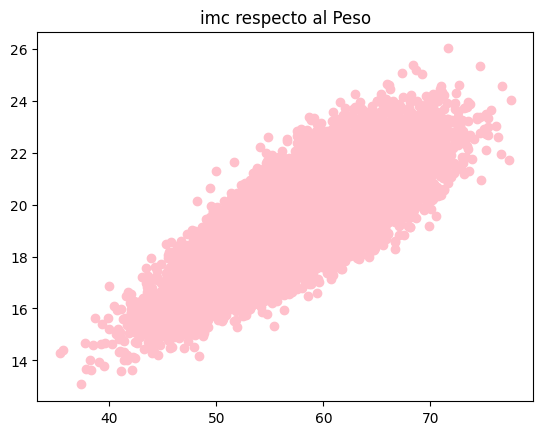

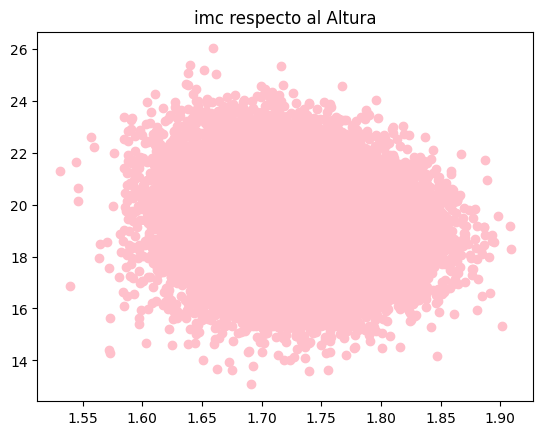

In [21]:
cols = ['Peso', 'Altura']
for col in cols:
  plt.plot(data[col], data['imc'], 'o', color='pink')
  plt.title('imc respecto al ' + col )
  plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
X = data['Altura'].values
X

array([1.67089607, 1.81648633, 1.762728  , ..., 1.64334317, 1.71524117,
       1.74949129])

In [26]:
X = data['Altura'].values.reshape(-1, 1)
X

array([[1.67089607],
       [1.81648633],
       [1.762728  ],
       ...,
       [1.64334317],
       [1.71524117],
       [1.74949129]])

In [27]:
y = data['imc'].values
y

array([18.35752853, 18.76253193, 22.33884155, ..., 19.86392265,
       20.39240882, 18.50597297])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)

(18750, 1)
(6250, 1)


In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = lin_reg.predict(X_test)
print('Predicciones: {}, \nReales: {}'.format(y_pred[:5], y_test[:5]))

Predicciones: [19.27620553 19.32948399 19.35344739 19.21680223 19.21704851], 
Reales: [20.16518796 17.07607646 20.88525475 18.65577903 14.78939551]


In [35]:
rmse = mean_squared_error(y_test, y_pred)
print('Error Cuadratico es:', rmse)
print('R2 o R cuadrada es:', r2_score(y_test, y_pred))

Error Cuadratico es: 2.3993117512462283
R2 o R cuadrada es: 0.013316153956482224


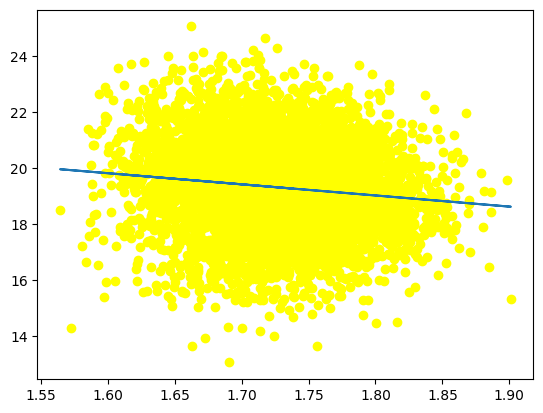

In [36]:
plt.plot(X_test, y_test,'o', color= 'yellow')
plt.plot(X_test, y_pred)
plt.show()

In [38]:
X = data['Peso'].values
X

array([51.25226808, 61.90927441, 69.41147157, ..., 53.64404814,
       59.99553284, 56.64159766])

In [39]:
X = data['Peso'].values.reshape(-1, 1)
X

array([[51.25226808],
       [61.90927441],
       [69.41147157],
       ...,
       [53.64404814],
       [59.99553284],
       [56.64159766]])

In [41]:
y = data['imc'].values
y

array([18.35752853, 18.76253193, 22.33884155, ..., 19.86392265,
       20.39240882, 18.50597297])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)

(18750, 1)
(6250, 1)


In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = lin_reg.predict(X_test)
print('Predicciones: {}, \nReales: {}'.format(y_pred[:5], y_test[:5]))

Predicciones: [20.08480544 17.7183552  20.26522435 19.24661453 16.46874004], 
Reales: [20.16518796 17.07607646 20.88525475 18.65577903 14.78939551]


In [46]:
rmse = mean_squared_error(y_test, y_pred)
print('Error Cuadratico es:', rmse)
print('R2 o R cuadrada es:', r2_score(y_test, y_pred))

Error Cuadratico es: 0.8970928466043557
R2 o R cuadrada es: 0.6310829471468398


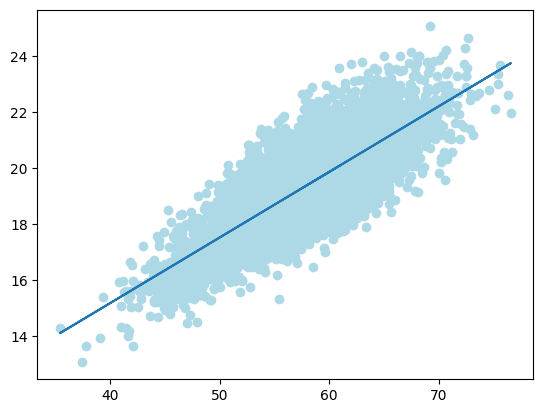

In [50]:
plt.plot(X_test, y_test,'o', color= 'lightblue')
plt.plot(X_test, y_pred)
plt.show()